In [170]:
# EXPLICIT FINITE DIFFERENCE METHOD ON THE HEAT EQUATION 
#     Ut = Uxx
# U(0,t) = U(1,t) = 0
# U(x,0) = x
# https://en.wikipedia.org/wiki/Finite_difference_method 

# IMPORTS
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

In [171]:
# DEFINITIONS
def isfloat(num):
    try:
        float(num)
        return 1
    except ValueError:
        return 0

In [177]:
# DEFINE AXES
xmax = 1
tmax = 1
xsteps = 10
tsteps = 40
x = np.linspace(0,xmax,xsteps)
t = np.linspace(0,tmax,tsteps)
X, T = np.meshgrid(x,t)

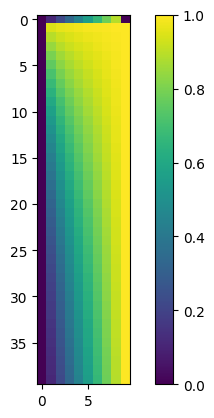

In [178]:
# INITIAL CONDITIONS
Z = X ** T
for i in range(len(Z[0])):
    Z[0][i] = x[i]
Z[0][xsteps-1] = 0
plt.imshow(Z)
# plt.contourf(x, t, Z, cmap = 'jet') 
plt.colorbar() 
plt.show()

In [179]:
# PROPOGATION
for i in np.arange(tsteps-1): # time
    for j in np.arange(xsteps-2)+1: # space
        Z[i][xsteps-1] = 0
        Z[i][0] = 0
        Z[i+1][j] = (Z[i][j] + Z[i][j-1] + Z[i][j+1])/3
        Z[i+1][0] = 0
        Z[i+1][xsteps-1] = 0

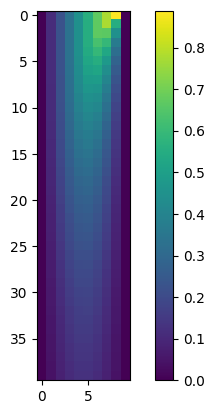

In [180]:
# 2D PLOTTING
# plt.contourf(x, t, Z, cmap = 'jet') 
plt.imshow(Z)
plt.colorbar() 
# plt.xlim(.8, 1)
# plt.ylim(-1, 20)
plt.show()

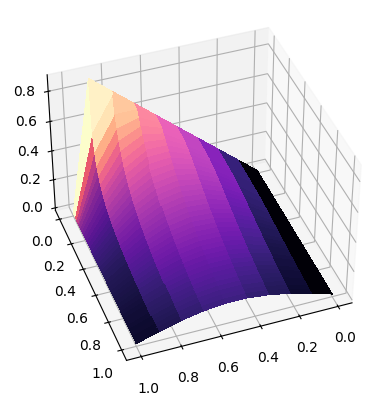

In [192]:
# 3D PLOTTING
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ls = LightSource(250, 30)
rgb = ls.shade(Z, cmap=cm.magma, vert_exag=0.1, blend_mode='soft')
surface = ax.plot_surface(X, T, Z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)
ax.view_init(elev=40., azim=70, roll=0)
plt.show()